In [24]:
import __init__
from adim import *
from jax import random
import jax.numpy as jnp

from numpyro.infer import Predictive
from matplotlib import pyplot as plt

In [17]:
xmin, xmax = -5.5, 5.5
rng_key, rng_key_ = random.split(random.PRNGKey(0))

noise_std = 0.1
vector_length = 1
fixed = 0
distribution = "bipolar"
thresholds = compute_thresholds(num_bits=3, phase=0, scale=1, distribution="bipolar", vector_length=vector_length).ravel()

/Users/johannes/Projects/Optimal Thresholds for Approximate Analog In-Memory Computing/.venv/lib/python3.12/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float64 to dtype=int64 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


In [18]:
MIbits(vector_length=vector_length, thresholds=thresholds, noise_std=noise_std, distribution="bipolar", fixed=fixed)
# MI(12, thresholds, noise_std=0.1, distribution="bipolar")

Array(1., dtype=float64)

In [19]:
jnp.exp(log_pdf_n(1, vector_length=vector_length, distribution=distribution))

Array(0.5, dtype=float64)

In [20]:
jnp.exp(log_pdf_y_n(jnp.array([[0,1]]), jnp.array([[-1],[0],[1]]), thresholds[None,None,...], noise_std=noise_std))

Array([[0.00000000e+000, 4.90671393e-198],
       [0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000]], dtype=float64)

In [21]:
jnp.exp(log_pdf_yn(jnp.array([[0,1]]), jnp.array([[-1],[0],[1]]), thresholds[None,None,...], noise_std=noise_std, vector_length=vector_length, distribution=distribution))

Array([[0.00000000e+000, 2.45335696e-198],
       [0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000]], dtype=float64)

In [22]:
jnp.exp(log_pdf_y(jnp.array([-1, 0, 1, 2]), thresholds[None,...], noise_std=noise_std, vector_length=vector_length, distribution=distribution))

Array([            nan, 0.00000000e+000, 2.45335696e-198, 3.80992651e-024],      dtype=float64)

In [ ]:
xmin, xmax = -5.5, 5.5
rng_key, rng_key_ = random.split(random.PRNGKey(0))

noise_std = 0.1
vector_length = 1
fixed = 0
distribution = "bipolar"
thresholds = compute_thresholds(num_bits=3, phase=0, scale=1, distribution="bipolar", vector_length=vector_length).ravel()

/Users/johannes/Projects/Optimal Thresholds for Approximate Analog In-Memory Computing/.venv/lib/python3.12/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float64 to dtype=int64 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


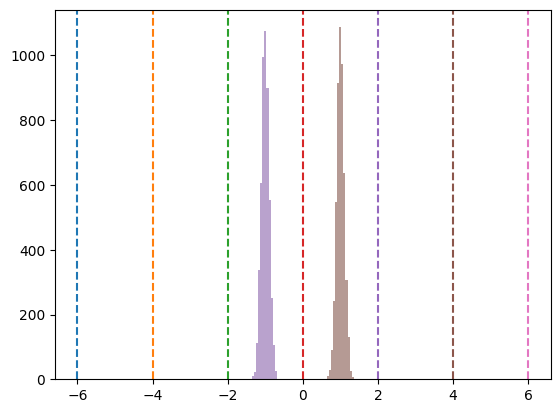

In [25]:

trace = Predictive(model, {}, num_samples=10000)(
    rng_key_, vector_length=vector_length, distribution=distribution, thresholds=thresholds
)

x_inset = jnp.take(
    trace["x"], jnp.where((xmin <= trace["x"]) * (trace["x"] <= xmax))[0]
)

bins = jnp.linspace(xmin, xmax, 200)

# sns.kdeplot(x_inset, label="x", gridsize=1000)
plt.hist(x_inset, bins=bins, alpha=0.5, label="x", color="silver")

for i, threshold in enumerate(thresholds[1:-1]):
    # compute x-values for each class
    x_y = jnp.take(trace["x"], jnp.where(trace["y"] == i)[0])
    plt.axvline(threshold, color=f"C{i}", linestyle="--")
    plt.hist(x_y, bins=bins, alpha=0.5, label=f"y={i}", color=f"C{i}")